# $\mathrm{GLYOX}$ (Glyoxal)

In [24]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [25]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [26]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [27]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

In [28]:
data = [
225	0.56	0.241	0.199	1
230	0.535	0.246	0.219	1
235	0.504	0.251	0.245	1
240	0.475	0.256	0.269	1
245	0.448	0.261	0.291	1
250	0.42	0.266	0.314	1
255	0.395	0.271	0.334	1
260	0.37	0.278	0.352	1
265	0.345	0.286	0.369	1
270	0.32	0.293	0.387	1
275	0.295	0.301	0.404	1
280	0.27	0.31	0.42	1
285	0.25	0.32	0.43	1
290	0.23	0.33	0.44	1
295	0.206	0.343	0.451	1
300	0.186	0.357	0.457	1
305	0.166	0.374	0.46	1
310	0.146	0.396	0.458	1
315	0.125	0.423	0.452	1
320	0.11	0.457	0.433	1
325	0.095	0.497	0.408	1
330	0.08	0.541	0.379	1
335	0.065	0.593	0.337	0.995
340	0.051	0.648	0.279	0.978
345	0.036	0.616	0.204	0.856
350	0.021	0.52	0.15	0.691
355	0.008	0.424	0.108	0.54
360	0	0.332	0.072	0.404
365	0	0.253	0.04	0.293
370	0	0.191	0.022	0.213
375	0	0.142	0.014	0.156
380	0	0.104	0.011	0.115
385	0	0.077	0.008	0.085
390	0	0.057	0.007	0.064
395	0	0.043	0.005	0.048
400	0	0.033	0.004	0.037
405	0	0.026	0.003	0.029
410	0	0.02	0.002	0.022
415	0	0.016	0.001	0.017
420	0	0.013	0	0.013
425	0	0.01	0	0.01
430	0	0.008	0	0.008
435	0	0.006	0	0.006
440	0	0.003	0	0.003
445	0	0.001	0	0.001
450	0	0	0	0
455	0	0	0	0
460	0	0	0	0    
]

λ = data[:,1]
Φ₁ = data[:,2]
Φ₂ = data[:,3]
Φ₃ = data[:,4]

48-element Vector{Float64}:
 0.199
 0.219
 0.245
 0.269
 0.291
 0.314
 0.334
 0.352
 0.369
 0.387
 0.404
 0.42
 0.43
 ⋮
 0.003
 0.002
 0.001
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

# Model Evaluation

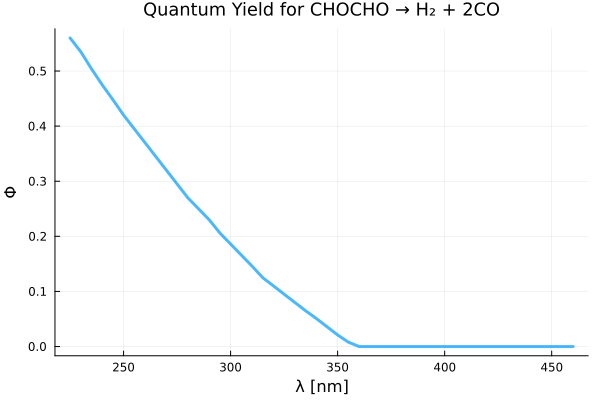

In [29]:
p = plot(
    λ,
    Φ₁,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CHOCHO → H₂ + 2CO",
    titlefontsize=12,
)

# Output for Photolysis Rate Determination

In [30]:
df_photolysis_Φ = CSV.File("../photolysis_Φ.csv") |> DataFrame

Row,Φ_1,Φ_2,Φ_3,Φ_4,Φ_6,Φ_5,Φ_7,Φ_8,Φ_11,Φ_12,Φ_13,Φ_14,Φ_15,Φ_16,Φ_17,Φ_18,Φ_19,Φ_20,Φ_21,Φ_22,Φ_23,Φ_24,Φ_31,Φ_32,Φ_33
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
5,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
8,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [31]:
λ_min = minimum(λ)
λ_max = maximum(λ)

#println(λ_min, "\t", minimum(df_photolysis_σ.λ))
#println(λ_max, "\t", maximum(df_photolysis_σ.λ))

460.0

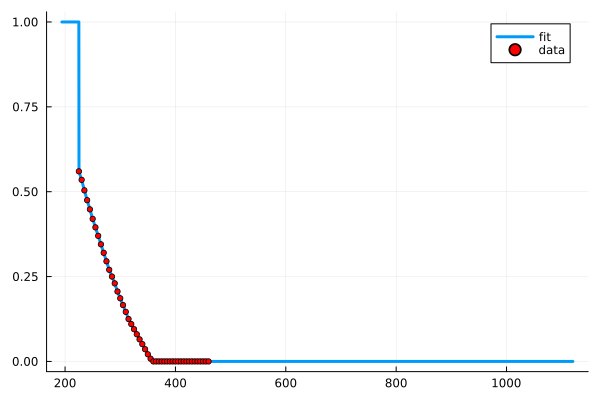

In [32]:
using DataInterpolations

cs = LinearInterpolation(Φ₁, λ)
Φ_out = cs(hr4000_df.λ)

# set anything outside of λ range to 0 as well
Φ_out[Φ_out .< 0.0] .= 0.0
Φ_out[ hr4000_df.λ .≥ λ_max] .= 0.0
Φ_out[hr4000_df.λ .≤ λ_min] .= 1.0


plot(hr4000_df.λ, Φ_out, lw=3, label="fit")
scatter!(λ, Φ₁, color=:red, ms=3, label="data")

In [33]:
df_photolysis_Φ.Φ_31 = Φ_out

describe(df_photolysis_Φ)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Φ_1,0.114981,0.0,0.0,1.0,0,Float64
2,Φ_2,0.885019,0.0,1.0,1.0,0,Float64
3,Φ_3,0.963542,0.0,1.0,1.0,0,Float64
4,Φ_4,0.214167,0.0,0.0,1.0,0,Float64
5,Φ_6,0.426121,0.0,0.0,1.0,0,Float64
6,Φ_5,0.00986771,0.0,0.0,0.344696,0,Float64
7,Φ_7,0.211623,0.0,0.0,1.0,0,Float64
8,Φ_8,0.945175,0.0,1.0,1.0,0,Float64
9,Φ_11,0.0470227,0.0,0.0,0.73106,0,Float64


In [34]:
CSV.write("../photolysis_Φ.csv", df_photolysis_Φ)

"../photolysis_Φ.csv"

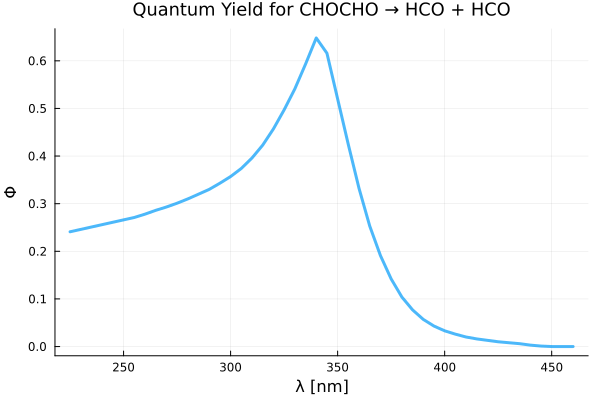

In [35]:
p = plot(
    λ,
    Φ₂,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CHOCHO → HCO + HCO",
    titlefontsize=12,
)

# Output for Photolysis Rate Determination

In [36]:
df_photolysis_Φ = CSV.File("../photolysis_Φ.csv") |> DataFrame

Row,Φ_1,Φ_2,Φ_3,Φ_4,Φ_6,Φ_5,Φ_7,Φ_8,Φ_11,Φ_12,Φ_13,Φ_14,Φ_15,Φ_16,Φ_17,Φ_18,Φ_19,Φ_20,Φ_21,Φ_22,Φ_23,Φ_24,Φ_31,Φ_32,Φ_33
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
5,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
8,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [37]:
λ_min = minimum(λ)
λ_max = maximum(λ)

#println(λ_min, "\t", minimum(df_photolysis_σ.λ))
#println(λ_max, "\t", maximum(df_photolysis_σ.λ))

460.0

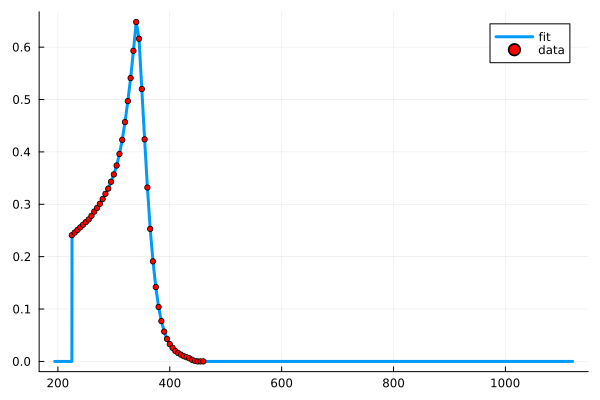

In [38]:
using DataInterpolations

cs = LinearInterpolation(Φ₂, λ)
Φ_out = cs(hr4000_df.λ)

# set anything outside of λ range to 0 as well
Φ_out[Φ_out .< 0.0] .= 0.0
Φ_out[ hr4000_df.λ .≥ λ_max] .= 0.0
Φ_out[hr4000_df.λ .≤ λ_min] .= 0.0


plot(hr4000_df.λ, Φ_out, lw=3, label="fit")
scatter!(λ, Φ₂, color=:red, ms=3, label="data")

In [39]:
df_photolysis_Φ.Φ_32 = Φ_out

describe(df_photolysis_Φ)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Φ_1,0.114981,0.0,0.0,1.0,0,Float64
2,Φ_2,0.885019,0.0,1.0,1.0,0,Float64
3,Φ_3,0.963542,0.0,1.0,1.0,0,Float64
4,Φ_4,0.214167,0.0,0.0,1.0,0,Float64
5,Φ_6,0.426121,0.0,0.0,1.0,0,Float64
6,Φ_5,0.00986771,0.0,0.0,0.344696,0,Float64
7,Φ_7,0.211623,0.0,0.0,1.0,0,Float64
8,Φ_8,0.945175,0.0,1.0,1.0,0,Float64
9,Φ_11,0.0470227,0.0,0.0,0.73106,0,Float64


In [40]:
CSV.write("../photolysis_Φ.csv", df_photolysis_Φ)

"../photolysis_Φ.csv"

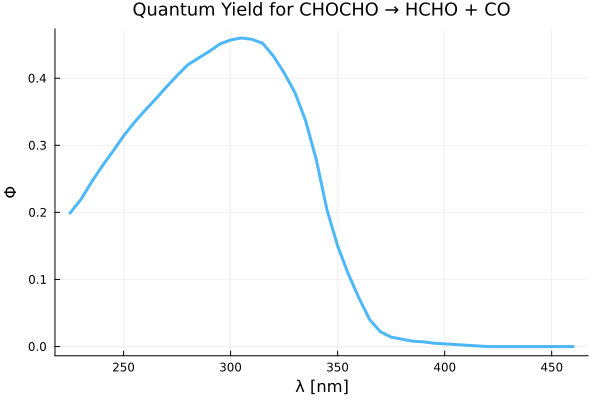

In [41]:
p = plot(
    λ,
    Φ₃,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CHOCHO → HCHO + CO",
    titlefontsize=12,
)

# Output for Photolysis Rate Determination

In [42]:
df_photolysis_Φ = CSV.File("../photolysis_Φ.csv") |> DataFrame

Row,Φ_1,Φ_2,Φ_3,Φ_4,Φ_6,Φ_5,Φ_7,Φ_8,Φ_11,Φ_12,Φ_13,Φ_14,Φ_15,Φ_16,Φ_17,Φ_18,Φ_19,Φ_20,Φ_21,Φ_22,Φ_23,Φ_24,Φ_31,Φ_32,Φ_33
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
5,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
8,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [43]:
λ_min = minimum(λ)
λ_max = maximum(λ)

#println(λ_min, "\t", minimum(df_photolysis_σ.λ))
#println(λ_max, "\t", maximum(df_photolysis_σ.λ))

460.0

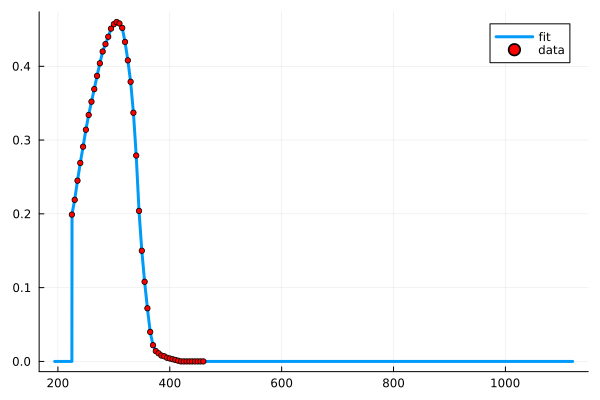

In [44]:
using DataInterpolations

cs = LinearInterpolation(Φ₃, λ)
Φ_out = cs(hr4000_df.λ)

# set anything outside of λ range to 0 as well
Φ_out[Φ_out .< 0.0] .= 0.0
Φ_out[ hr4000_df.λ .≥ λ_max] .= 0.0
Φ_out[hr4000_df.λ .≤ λ_min] .= 0.0


plot(hr4000_df.λ, Φ_out, lw=3, label="fit")
scatter!(λ, Φ₃, color=:red, ms=3, label="data")

In [45]:
df_photolysis_Φ.Φ_33 = Φ_out

describe(df_photolysis_Φ)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Φ_1,0.114981,0.0,0.0,1.0,0,Float64
2,Φ_2,0.885019,0.0,1.0,1.0,0,Float64
3,Φ_3,0.963542,0.0,1.0,1.0,0,Float64
4,Φ_4,0.214167,0.0,0.0,1.0,0,Float64
5,Φ_6,0.426121,0.0,0.0,1.0,0,Float64
6,Φ_5,0.00986771,0.0,0.0,0.344696,0,Float64
7,Φ_7,0.211623,0.0,0.0,1.0,0,Float64
8,Φ_8,0.945175,0.0,1.0,1.0,0,Float64
9,Φ_11,0.0470227,0.0,0.0,0.73106,0,Float64


In [46]:
CSV.write("../photolysis_Φ.csv", df_photolysis_Φ)

"../photolysis_Φ.csv"